# Explore Social Ratings
This notebook includes data cleaning, data exploration and principal compontent analysis (PCA) of the social ratings associated with the face images.

---

### Content:

- **1) Load Packages & Data**
- **2) Data Cleaning**
    - a) Edit column names
    - b) Check datatypes
    - c) Check for missing values
    - d) Check for catch questions
    - e) Rearrange social ratings
- **3) Data Exploration**
    - a) Distribution of social ratings
    - b) Distribution of demographic ratings
    - c) Distribution of social ratings by demographics
    - d) Correlation of social ratings
    - e) Faces with minimal/maximal social ratings
- **4) PCA**
    - a) Standard scaling
    - b) Perform PCA
    - c) Transform data
    - d) Faces with minimal/maximal principal compontent scores
---


# 1) Load Packages & Data

In [1]:
# load basic packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
import matplotlib.image as mpimg

sns.set_style('white')
pd.options.display.max_columns = 100

In [2]:
# load all social ratings from csv-file

data_dir = '/Users/kacha/nf-ds/nf_capstone/10k_US_Data/Full Attribute Scores/psychology attributes/'

# optional: use publication-friendly data
# data_dir = ('/Users/kacha/nf-ds/nf_capstone/10k_US_Data/'
#             'Publication Friendly 49-Face Database/Attribute Scores/psychology attributes/')

df_all = pd.read_csv(data_dir + 'psychology_attributes_All.csv')
df_all.head(3)

,Filename,Image #,atypical,boring,calm,catch,catchAns,cold,common,confident,egotistic,emotUnstable,forgettable,intelligent,introverted,kind,responsible,subID,subage,submale,subrace,trustworthy,unattractive,unemotional,unfamiliar,unfriendly,unhappy,weird,aggressive,attractive,caring,catch.1,catchAns.1,emotStable,emotional,familiar,friendly,happy,humble,interesting,irresponsible,mean,memorable,normal,sociable,subID.1,subage.1,submale.1,subrace.1,typical,uncertain,uncommon,unintelligent,untrustworthy
0,Google_1_Danielle Goble_5_oval.jpg,1,4.0,6.0,6.0,7.0,7.0,6.0,5.0,7.0,3.0,4.0,6.0,4.0,7.0,2.0,6.0,922.0,4.0,0.0,4.0,4.0,3.0,3.0,6.0,6.0,5.0,6.0,5.0,2.0,3.0,9.0,9,4.0,4.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,5.0,4.0,670,2.0,1.0,0.0,4.0,3.0,5.0,5.0,6.0
1,Google_1_Danielle Goble_5_oval.jpg,1,3.0,9.0,6.0,9.0,9.0,1.0,8.0,4.0,3.0,1.0,9.0,6.0,3.0,6.0,6.0,113.0,3.0,0.0,1.0,4.0,9.0,7.0,1.0,4.0,3.0,1.0,2.0,7.0,7.0,3.0,3,8.0,6.0,7.0,8.0,4.0,6.0,4.0,2.0,2.0,3.0,8.0,8.0,306,4.0,1.0,1.0,7.0,2.0,2.0,1.0,2.0
2,Google_1_Danielle Goble_5_oval.jpg,1,5.0,5.0,6.0,8.0,8.0,5.0,5.0,7.0,6.0,5.0,5.0,6.0,5.0,5.0,5.0,901.0,4.0,0.0,1.0,5.0,7.0,5.0,8.0,5.0,4.0,5.0,6.0,5.0,4.0,5.0,5,6.0,5.0,3.0,5.0,5.0,3.0,6.0,4.0,6.0,6.0,6.0,6.0,1274,3.0,0.0,2.0,5.0,4.0,7.0,4.0,4.0


In [3]:
# load mean social ratings from csv-file

df_mean = pd.read_csv(data_dir + 'psychology_attributes_Mean.csv')
df_mean.head(3)

,Filename,Image #,atypical,boring,calm,catch,catchAns,cold,common,confident,egotistic,emotUnstable,forgettable,intelligent,introverted,kind,responsible,subID,subage,submale,subrace,trustworthy,unattractive,unemotional,unfamiliar,unfriendly,unhappy,weird,aggressive,attractive,caring,catch.1,catchAns.1,emotStable,emotional,familiar,friendly,happy,humble,interesting,irresponsible,mean,memorable,normal,sociable,subID.1,subage.1,submale.1,subrace.1,typical,uncertain,uncommon,unintelligent,untrustworthy
0,Google_1_Danielle Goble_5_oval.jpg,1,3.93,6.00,6.29,5.93,5.93,4.13,5.53,5.67,3.67,3.20,4.93,5.60,5.13,5.00,5.80,NaN,3.0,0.0,2.0,5.33,4.40,4.47,4.07,4.60,3.73,3.93,4.80,4.87,4.67,5.87,5.93,5.80,3.67,4.00,4.33,3.80,4.73,4.13,3.53,4.53,4.40,5.93,4.67,NaN,4.00,0.00,1.0,5.40,4.27,4.67,3.33,3.67
1,Google_1_Phillip Owensby_9_oval.jpg,2,2.93,3.87,6.47,5.00,5.00,2.07,5.93,6.53,2.20,2.13,4.60,6.60,2.60,7.00,7.47,NaN,3.0,0.5,1.0,6.73,3.27,2.07,3.27,1.87,2.00,1.67,3.13,4.73,6.93,5.93,5.93,7.07,5.80,4.27,6.73,7.13,6.13,4.93,2.20,2.53,4.40,7.33,6.60,NaN,3.50,0.50,1.0,5.73,2.60,2.60,2.67,2.60
2,Google_1_Douglas Ziegler_3_oval.jpg,3,2.87,4.20,6.67,4.73,4.73,3.20,5.73,6.07,3.60,2.93,4.27,6.47,3.40,6.47,6.67,NaN,NaN,NaN,NaN,6.40,3.87,2.87,3.80,2.60,2.93,3.20,2.40,4.60,6.07,4.73,4.73,6.20,5.14,4.40,6.67,6.73,5.67,4.80,2.47,2.53,4.73,6.20,6.67,NaN,2.75,0.75,1.0,5.93,3.27,3.33,2.73,2.73


In [4]:
# load sd of social ratings from csv-file

df_sd = pd.read_csv(data_dir + 'psychology_attributes_SD.csv')
df_sd.head(3)

,Filename,Image #,atypical,boring,calm,catch,catchAns,cold,common,confident,egotistic,emotUnstable,forgettable,intelligent,introverted,kind,responsible,subID,subage,submale,subrace,trustworthy,unattractive,unemotional,unfamiliar,unfriendly,unhappy,weird,aggressive,attractive,caring,catch.1,catchAns.1,emotStable,emotional,familiar,friendly,happy,humble,interesting,irresponsible,mean,memorable,normal,sociable,subID.1,subage.1,submale.1,subrace.1,typical,uncertain,uncommon,unintelligent,untrustworthy
0,Google_1_Danielle Goble_5_oval.jpg,1,1.91,2.14,1.49,2.28,2.28,2.23,2.03,1.72,2.13,1.86,2.31,1.99,2.23,1.89,1.70,NaN,0.0,0.00,1.41,1.50,2.59,2.20,2.34,1.92,1.79,2.43,1.74,2.13,1.91,2.53,2.43,1.82,1.40,1.77,1.99,1.32,1.44,1.64,2.07,1.96,1.76,2.02,1.84,NaN,0.00,0.00,0.0,2.23,1.98,2.02,1.99,1.84
1,Google_1_Phillip Owensby_9_oval.jpg,2,1.91,2.61,1.30,2.65,2.65,1.33,1.79,1.06,1.37,1.41,2.80,1.06,1.68,1.36,1.06,NaN,0.0,0.71,0.00,1.79,1.83,1.16,2.31,0.92,1.62,1.05,2.07,1.79,1.33,2.58,2.58,1.33,1.90,2.74,2.05,1.60,2.00,2.52,1.42,1.68,2.20,1.63,1.68,NaN,2.12,0.71,0.0,2.34,1.30,1.88,1.88,1.99
2,Google_1_Douglas Ziegler_3_oval.jpg,3,1.85,2.43,1.18,2.81,2.81,1.97,2.09,2.02,1.88,2.22,2.12,1.13,2.10,1.51,0.90,NaN,NaN,NaN,NaN,1.06,2.29,1.51,2.11,1.64,1.67,2.40,1.18,1.76,1.16,2.84,2.84,1.15,1.35,2.29,1.05,1.87,1.29,1.86,1.30,1.25,2.40,1.86,1.50,NaN,0.50,0.50,0.0,2.05,1.94,2.16,1.79,1.71


In [5]:
# load demographic ratings from csv-file

demo_data_dir = '/Users/kacha/nf-ds/nf_capstone/10k_US_Data/Full Attribute Scores/demographic & others labels/'
df_demo = pd.read_csv(demo_data_dir + 'demography_attributes_Mean.csv')
df_demo.head(3)

,Filename,Image #,Age,Attractive,Is this person famous?,Common?,How much emotion is in this face?,Emotion?,Eyes direction?,Face direction?,Facial hair?,Catch question,Friendly,Makeup?,Gender,Would you cast this person as the star of a movie?,Would this be a good profile picture?,Image quality,Race,Memorable,At what speed do you think this expression is happening?,How much teeth is showing?
0,Google_1_Danielle Goble_5_oval.jpg,1,3.00,3.00,0,3.08,2.25,0,1,1,2,1,3.17,0,1,0.92,2,4.08,1,3.42,2.58,0
1,Google_1_Phillip Owensby_9_oval.jpg,2,4.00,2.42,0,3.17,3.92,1,1,1,0,1,4.33,1,0,0.33,2,4.25,1,2.58,3.42,2
2,Google_1_Douglas Ziegler_3_oval.jpg,3,3.17,2.75,0,2.92,4.33,1,1,1,0,1,4.17,0,1,0.75,2,4.25,1,3.17,3.83,2


---
# 2) Data Cleaning

### a) Edit column names

In [6]:
# edit column names in all dataframes with social ratings

col_replace_dict = {'Image #': 'imageID',
                    'Filename': 'filename',
                    'egotistic': 'egoistic',
                    'emotStable': 'stable',
                    'emotUnstable': 'unstable'}

df_all.rename(columns=col_replace_dict, inplace=True)
df_mean.rename(columns=col_replace_dict, inplace=True)
df_sd.rename(columns=col_replace_dict, inplace=True)

df_all.columns

Index(['filename', 'imageID', 'atypical', 'boring', 'calm', 'catch',
       'catchAns', 'cold', 'common', 'confident', 'egoistic', 'unstable',
       'forgettable', 'intelligent', 'introverted', 'kind', 'responsible',
       'subID', 'subage', 'submale', 'subrace', 'trustworthy', 'unattractive',
       'unemotional', 'unfamiliar', 'unfriendly', 'unhappy', 'weird',
       'aggressive', 'attractive', 'caring', 'catch.1', 'catchAns.1', 'stable',
       'emotional', 'familiar', 'friendly', 'happy', 'humble', 'interesting',
       'irresponsible', 'mean', 'memorable', 'normal', 'sociable', 'subID.1',
       'subage.1', 'submale.1', 'subrace.1', 'typical', 'uncertain',
       'uncommon', 'unintelligent', 'untrustworthy'],
      dtype='object')

In [27]:
# make dictionary to store image IDs and corresponding filenames

img_dict = {ID: file for (ID, file) in zip(df_mean.imageID.unique(), df_mean.filename.unique())}
img_dict[1], img_dict[len(df_mean)]

('Google_1_Danielle Goble_5_oval.jpg', 'Google_1_Eileen Burd_7_oval.jpg')

In [7]:
# edit column names in demographic ratings dataframe to snake_case

df_demo.rename(str.lower, axis='columns', inplace=True)
df_demo.columns = df_demo.columns.str.replace(' ', '_')
df_demo.columns = df_demo.columns.str.replace('?','')

df_demo.columns

Index(['filename', 'image_#', 'age', 'attractive', 'is_this_person_famous',
       'common', 'how_much_emotion_is_in_this_face', 'emotion',
       'eyes_direction', 'face_direction', 'facial_hair', 'catch_question',
       'friendly', 'makeup', 'gender',
       'would_you_cast_this_person_as_the_star_of_a_movie',
       'would_this_be_a_good_profile_picture', 'image_quality', 'race',
       'memorable', 'at_what_speed_do_you_think_this_expression_is_happening',
       'how_much_teeth_is_showing'],
      dtype='object')

In [8]:
# shorten some column names in demographic ratings dataframe

demo_col_replace_dict = {'image_#': 'imageID',
                         'is_this_person_famous': 'famous',
                         'how_much_emotion_is_in_this_face': 'emotion_grade',
                         'would_you_cast_this_person_as_the_star_of_a_movie': 'movie_star',
                         'would_this_be_a_good_profile_picture': 'profile_picture',
                         'at_what_speed_do_you_think_this_expression_is_happening': 'speed',
                         'how_much_teeth_is_showing': 'teeth'}

df_demo.rename(columns=demo_col_replace_dict, inplace=True)
df_demo.columns

Index(['filename', 'imageID', 'age', 'attractive', 'famous', 'common',
       'emotion_grade', 'emotion', 'eyes_direction', 'face_direction',
       'facial_hair', 'catch_question', 'friendly', 'makeup', 'gender',
       'movie_star', 'profile_picture', 'image_quality', 'race', 'memorable',
       'speed', 'teeth'],
      dtype='object')

### b) Check datatypes

In [15]:
# check datatypes for mean ratings

df_mean.dtypes

filename          object
imageID            int64
atypical         float64
boring           float64
calm             float64
catch            float64
catchAns         float64
cold             float64
common           float64
confident        float64
egoistic         float64
unstable         float64
forgettable      float64
intelligent      float64
introverted      float64
kind             float64
responsible      float64
subID            float64
subage           float64
submale          float64
subrace          float64
trustworthy      float64
unattractive     float64
unemotional      float64
unfamiliar       float64
unfriendly       float64
unhappy          float64
weird            float64
aggressive       float64
attractive       float64
caring           float64
catch.1          float64
catchAns.1       float64
stable           float64
emotional        float64
familiar         float64
friendly         float64
happy            float64
humble           float64
interesting      float64


In [16]:
# check datatypes for demographic ratings

df_demo.dtypes

filename            object
imageID              int64
age                float64
attractive         float64
famous               int64
common             float64
emotion_grade      float64
emotion              int64
eyes_direction       int64
face_direction       int64
facial_hair          int64
catch_question       int64
friendly           float64
makeup               int64
gender               int64
movie_star         float64
profile_picture      int64
image_quality      float64
race                 int64
memorable          float64
speed              float64
teeth                int64
dtype: object

### c) Check for missing values

In [17]:
# check missing values for mean ratings

df_mean.isna().sum()

filename            0
imageID             0
atypical            0
boring              0
calm                0
catch               0
catchAns            0
cold                0
common              0
confident           0
egoistic            0
unstable            0
forgettable         0
intelligent         0
introverted         0
kind                0
responsible         0
subID            2222
subage            360
submale           359
subrace           361
trustworthy         0
unattractive        0
unemotional         0
unfamiliar          0
unfriendly          0
unhappy             0
weird               0
aggressive          0
attractive          0
caring              0
catch.1             0
catchAns.1          0
stable              0
emotional           0
familiar            0
friendly            0
happy               0
humble              0
interesting         0
irresponsible       0
mean                0
memorable           0
normal              0
sociable            0
subID.1   

In [18]:
# check missing values for demographic ratings

df_demo.isna().sum()

filename            0
imageID             0
age                 4
attractive          8
famous              0
common             18
emotion_grade       9
emotion             0
eyes_direction      0
face_direction      0
facial_hair         0
catch_question      0
friendly           13
makeup              0
gender              0
movie_star          7
profile_picture     0
image_quality      13
race                0
memorable           9
speed              16
teeth               0
dtype: int64

### d) Check for catch questions

In [30]:
# check how many raters did not correctly answer the catch question

(df_all.catch != df_all.catchAns).sum(), (df_all['catch.1'] != df_all['catchAns.1']).sum()

(279, 295)

In [41]:
# example for a rater who did not answer the first catch question correctly
# Note: ratings of such raters are not included in the mean social ratings dataframe

incorrect_raters = df_all.index[df_all.catch != df_all.catchAns].tolist()
df_all.iloc[incorrect_raters[1:2],:]

,filename,imageID,atypical,boring,calm,catch,catchAns,cold,common,confident,egoistic,unstable,forgettable,intelligent,introverted,kind,responsible,subID,subage,submale,subrace,trustworthy,unattractive,unemotional,unfamiliar,unfriendly,unhappy,weird,aggressive,attractive,caring,catch.1,catchAns.1,stable,emotional,familiar,friendly,happy,humble,interesting,irresponsible,mean,memorable,normal,sociable,subID.1,subage.1,submale.1,subrace.1,typical,uncertain,uncommon,unintelligent,untrustworthy
317,Google_1_Jacob Work_1_oval.jpg,22,5.0,7.0,5.0,3.0,5.0,6.0,7.0,6.0,4.0,6.0,5.0,4.0,6.0,5.0,4.0,1175.0,2.0,1.0,0.0,9.0,4.0,7.0,6.0,8.0,6.0,6.0,7.0,1.0,6.0,9.0,9,2.0,6.0,7.0,3.0,5.0,7.0,4.0,4.0,5.0,7.0,3.0,5.0,1073,2.0,0.0,1.0,3.0,3.0,7.0,3.0,3.0


### e) Rearrange social ratings

In [42]:
# rearrange social ratings to pairs

social_pairs =[['trustworthy', 'untrustworthy'],
               ['friendly', 'unfriendly'],               
               ['sociable', 'introverted'],
               ['attractive', 'unattractive'],
               ['emotional', 'unemotional'], 
               ['intelligent', 'unintelligent'],
               ['calm', 'aggressive'],
               ['caring', 'cold'], 
               ['interesting', 'boring'],    
               ['stable', 'unstable'],    
               ['memorable', 'forgettable'],
               ['confident', 'uncertain'],    
               ['typical', 'atypical'],
               ['common', 'uncommon'],    
               ['happy', 'unhappy'],    
               ['humble', 'egoistic'],
               ['responsible', 'irresponsible'],    
               ['familiar', 'unfamiliar'],    
               ['kind', 'mean'],
               ['normal', 'weird']]

In [45]:
# get sub-lists with only positive and negative attributes

social_pos = [pair[0] for pair in social_pairs]
social_neg = [pair[1] for pair in social_pairs]

In [46]:
# make a new dataframe where positive attributes are listed before negative attributes (for heatmap, see below)

social_all = social_pos + social_neg
df_ratings = df_mean[['filename', 'imageID'] + social_all]
df_ratings.head(3)

,filename,imageID,trustworthy,friendly,sociable,attractive,emotional,intelligent,calm,caring,interesting,stable,memorable,confident,typical,common,happy,humble,responsible,familiar,kind,normal,untrustworthy,unfriendly,introverted,unattractive,unemotional,unintelligent,aggressive,cold,boring,unstable,forgettable,uncertain,atypical,uncommon,unhappy,egoistic,irresponsible,unfamiliar,mean,weird
0,Google_1_Danielle Goble_5_oval.jpg,1,5.33,4.33,4.67,4.87,3.67,5.60,6.29,4.67,4.13,5.80,4.40,5.67,5.40,5.53,3.80,4.73,5.80,4.00,5.00,5.93,3.67,4.60,5.13,4.40,4.47,3.33,4.80,4.13,6.00,3.20,4.93,4.27,3.93,4.67,3.73,3.67,3.53,4.07,4.53,3.93
1,Google_1_Phillip Owensby_9_oval.jpg,2,6.73,6.73,6.60,4.73,5.80,6.60,6.47,6.93,4.93,7.07,4.40,6.53,5.73,5.93,7.13,6.13,7.47,4.27,7.00,7.33,2.60,1.87,2.60,3.27,2.07,2.67,3.13,2.07,3.87,2.13,4.60,2.60,2.93,2.60,2.00,2.20,2.20,3.27,2.53,1.67
2,Google_1_Douglas Ziegler_3_oval.jpg,3,6.40,6.67,6.67,4.60,5.14,6.47,6.67,6.07,4.80,6.20,4.73,6.07,5.93,5.73,6.73,5.67,6.67,4.40,6.47,6.20,2.73,2.60,3.40,3.87,2.87,2.73,2.40,3.20,4.20,2.93,4.27,3.27,2.87,3.33,2.93,3.60,2.47,3.80,2.53,3.20


In [47]:
# save ratings dataframe for modeling (performed in a different notebook)

save_path = '/Users/kacha/nf-ds/nf_capstone/10k_US_Data/'
#df_ratings.to_csv(save_path + 'df_ratings.csv', index=False)

---
# 3) Data Exploration

### a) Distribution of social ratings

In [59]:
# write function to plot histograms

def plot_hist(df, col_pairs, xlims=None):
  
    n_col_pairs = len(col_pairs)

    plt.subplots(n_col_pairs,2, figsize=(12,3.5*n_col_pairs))
    plt.subplots_adjust(hspace=0.4)
    
    for i, pair in enumerate(col_pairs):
    
        plt.subplot(n_col_pairs,2, 2*i +1)
        df[pair[0]].hist(bins=25)
        if xlims:
            plt.xlim(xlims)
        plt.title(pair[0]);
        
        plt.subplot(n_col_pairs,2, 2*i +2)
        df[pair[1]].hist(bins=25)
        if xlims:
            plt.xlim(xlims)
        plt.title(pair[1]);

In [62]:
# write function to plot distributions (with kernel density estimation (kde))

def plot_dist(df, col_pairs, xlims=None, kde=True):
  
    n_col_pairs = len(col_pairs)

    plt.subplots(n_col_pairs,2, figsize=(12,3.5*n_col_pairs))
    plt.subplots_adjust(hspace=0.4)
    
    for i, pair in enumerate(col_pairs):
    
        plt.subplot(n_col_pairs,2, 2*i +1)
        sns.distplot(df[pair[0]], kde=kde)
        plt.xlabel(None)
        if xlims:
            plt.xlim(xlims)
        plt.title(pair[0]);
        
        plt.subplot(n_col_pairs,2, 2*i +2)
        sns.distplot(df[pair[1]], kde=kde)
        plt.xlabel(None)
        if xlims:
            plt.xlim(xlims)
        plt.title(pair[1]);

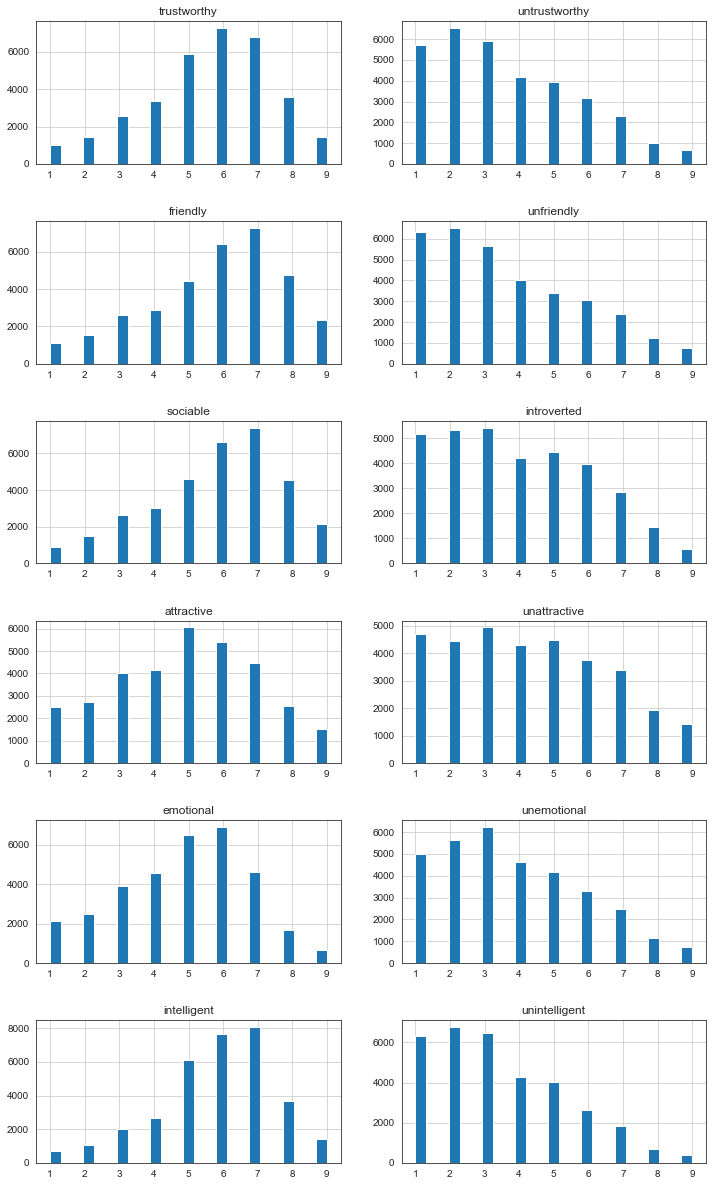

In [63]:
# plot histogram for the first six attribute pairs (single ratings, not averaged)

plot_hist(df_all, social_pairs[:6])

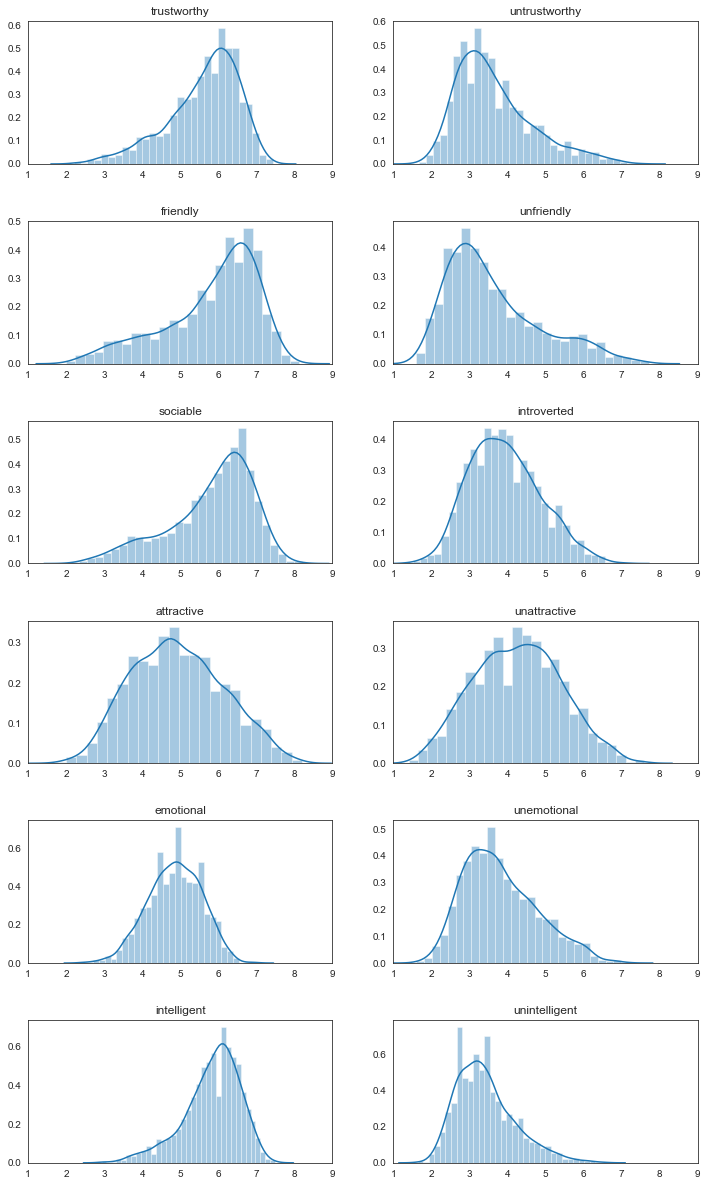

In [64]:
# plot histogram for the first six attribute pairs (mean ratings)

plot_dist(df_mean, social_pairs[:6], xlims=(1,9))

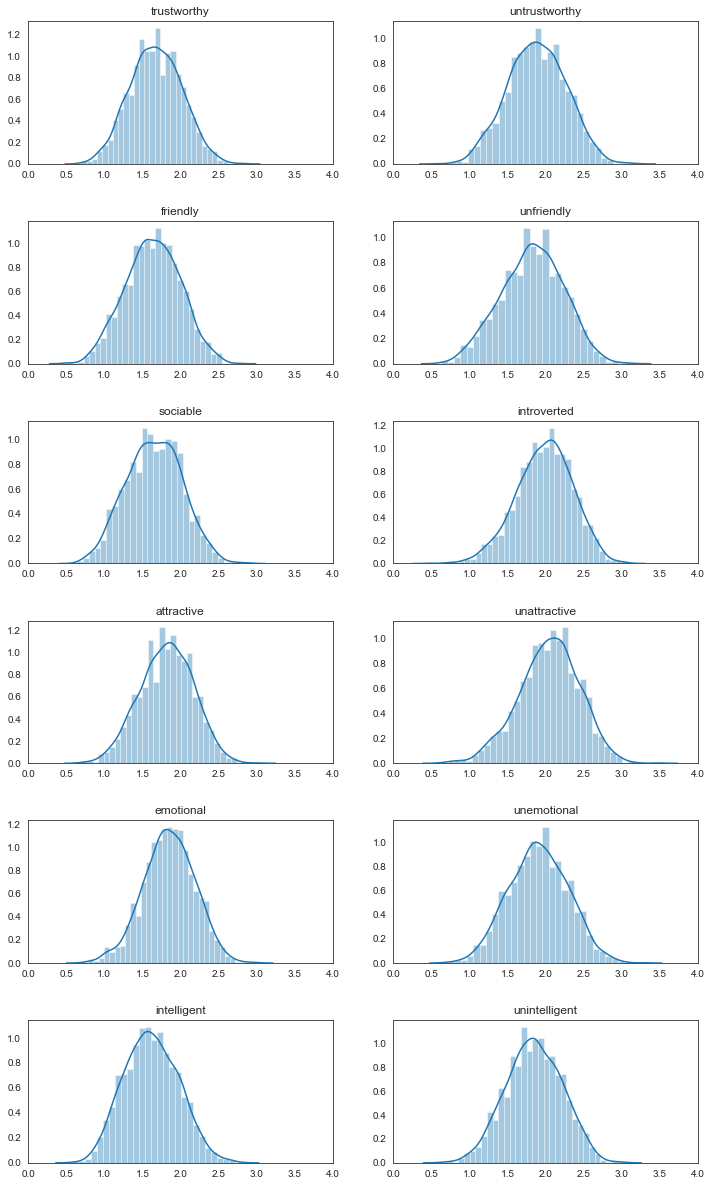

In [66]:
# plot histogram for the first six attribute pairs (sd of ratings)

plot_dist(df_sd, social_pairs[:6], xlims=(0,4))

### b) Distribution of demographic ratings

**Explanation of the columns in the demographic ratings dataframe:**
- Column 1 - Face's Age
	- 1 = < 20 years
	- 2 = 20 - 30 years
	- 3 = 30 - 45 years
	- 4 = 45 - 60 years
	- 5 = 60+ years
- Column 2 - How attractive is this face?
	- 1 (unattractive) - 5 (attractive)
- Column 3 - Is this person famous?
	- 0 = No		1 = Maybe		2 = Yes
- Column 4 - How common is this face?
	- 1 (uncommon) - 5 (common)
- Column 5 - How much emotion is in this face?
	- 1 (little) - 5 (a lot)
- Column 6 - Emotion?
	- 0 = Neutral
	- 1 = Happiness
	- 2 = Sadness
	- 3 = Anger
	- 4 = Fear
	- 5 = Surprise
	- 6 = Disgust
- Column 7 - Eyes direction?
	- 1 = At you
	- 2 = Up
	- 3 = Down
	- 4 = Left (of screen)
	- 5 = Right (of screen)
- Column 8 - Face direction?
	- 1 = At you
	- 2 = Up
	- 3 = Down
	- 4 = Left (of screen)
	- 5 = Right (of screen)
- Column 9 - Facial hair?
	- 0 = None		1 = A little		2 = A lot
- Column 10 - Catch question: 
    - This was a question to ensure participants were seriously answering the questions. They had to identify the color of a randomly colored frame around the face (red, green, or blue). If this value is 0, then the participant failed the question, and if it is 1, then they passed.
- Column 11 - How friendly is this person?
	- 1 (very unfriendly - 5 (very friendly)
- Column 12 - Makeup?
	- 0 = None		1 = A little		2 = A lot
- Column 13 - Gender?
	- 0 = Female		1 = Male
- Column 14 - Would you cast this person as the star of a movie?
	- 0 = No			1 = Maybe			2 = Yes
- Column 15 - Would this be a good profile picture?
	- 0 = No			1 = Maybe			2 = Yes
- Column 16 - Image quality?
	- 1 (poor) - 5 (very good)
- Column 17 - Race?
	- Note: These races were selected based on common demographics of Amazon Mechanical Turk.
	- 0 = Other
	- 1 = White
	- 2 = Black
	- 3 = East Asian
	- 4 = South Asain
	- 5 = Hispanic
	- 6 = Middle Eastern
- Column 18 - How memorable is this face?
	- 1 (forgettable) - 5 (memorable)
- Column 19 - At what speed do you think this expression is happening?
	- 1 (slowly) - 5 (quickly)
- Column 20 - How much teeth is showing?
	- 0 = None		1 = A little		2 = A lot

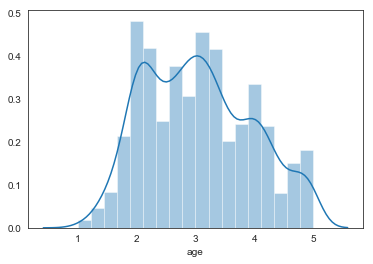

In [69]:
# distribution of age ratings
sns.distplot(df_demo.age.dropna());

In [71]:
# distribution of emotional expression ratings
# 0: Neutral, 1: Happiness, 2: Sadness, 3: Anger, 4: Fear, 5: Surprise, 6: Disgust
df_demo.emotion.value_counts() 

1    1511
0     637
3      28
2      23
5      11
6      11
4       1
Name: emotion, dtype: int64

In [72]:
# distribution of eyes direction ratings
# 1: At you, 2: Up, 3: Down, 4: Left (of screen), 5: Right (of screen)
df_demo.eyes_direction.value_counts()  

1    2030
5      96
4      83
3       7
2       6
Name: eyes_direction, dtype: int64

In [73]:
# distribution of face direction ratings
# 1: At you, 2: Up, 3: Down, 4: Left (of screen), 5: Right (of screen)
df_demo.face_direction.value_counts() 

1    1816
5     207
4     191
2       6
3       2
Name: face_direction, dtype: int64

In [74]:
# distribution of facial hair ratings
# 0: None, 1: A little, 2: A lot
df_demo.facial_hair.value_counts()  

0    1736
1     347
2     139
Name: facial_hair, dtype: int64

In [75]:
# distribution of makeup ratings
# 0: None, 1: A little, 2: A lot
df_demo.makeup.value_counts()  

0    1415
1     687
2     120
Name: makeup, dtype: int64

In [76]:
# distribution of gender ratings
# 0: Female, 1: Male
df_demo.gender.value_counts() 

1    1269
0     953
Name: gender, dtype: int64

In [78]:
# distribution of race ratings
# 0: Other, 1: White, 2: Black, 3: East Asian, 4: South Asian, 5: Hispanic, 6: Middle East
df_demo.race.value_counts() 

1    1836
2     220
5      72
3      63
6      24
4       5
0       2
Name: race, dtype: int64

In [77]:
# distribution of teeth ratings
# 0: None, 1: A little, 2: A lot
df_demo.teeth.value_counts() 

0    818
2    798
1    606
Name: teeth, dtype: int64

### c) Distribution of social ratings by demographics

In [80]:
# Combine demographic ratings and mean ratings of selected attribute (trustworthiness)

df_demo.rename(index=int, inplace=True)  # have to convert indices to int for combining both datasets
df_demo_trust = pd.concat([df_demo, df_mean.trustworthy], axis=1)
df_demo_trust.drop(labels=['filename', 'imageID','catch_question'], axis=1, inplace=True)
df_demo_trust.head()

,age,attractive,famous,common,emotion_grade,emotion,eyes_direction,face_direction,facial_hair,friendly,makeup,gender,movie_star,profile_picture,image_quality,race,memorable,speed,teeth,trustworthy
0,3.00,3.00,0,3.08,2.25,0,1,1,2,3.17,0,1,0.92,2,4.08,1,3.42,2.58,0,5.33
1,4.00,2.42,0,3.17,3.92,1,1,1,0,4.33,1,0,0.33,2,4.25,1,2.58,3.42,2,6.73
2,3.17,2.75,0,2.92,4.33,1,1,1,0,4.17,0,1,0.75,2,4.25,1,3.17,3.83,2,6.40
3,3.08,2.00,0,3.08,2.00,0,1,1,1,2.00,0,1,0.25,0,3.83,2,2.92,2.75,0,3.87
4,2.83,2.50,0,2.67,2.67,1,1,4,1,3.17,0,1,0.42,1,3.67,6,2.92,2.50,0,4.67


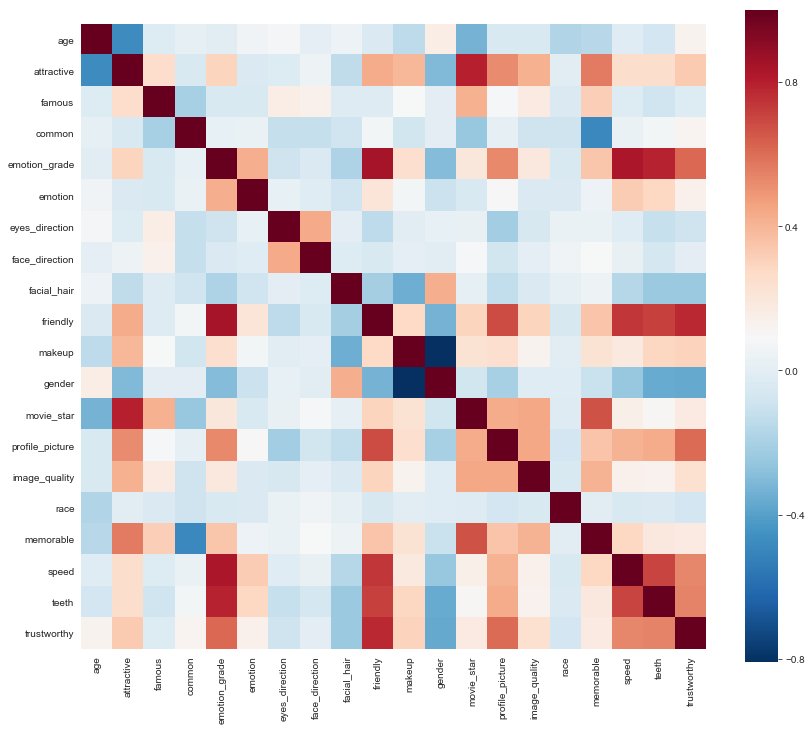

In [81]:
# plot heatmap showing correlations between demographics and trustworthiness ratings

corrm = df_demo_trust.corr()
fig, ax = plt.subplots(1,1, figsize=(14,12))
sns.heatmap(corrm, cmap='RdBu_r', square=True);

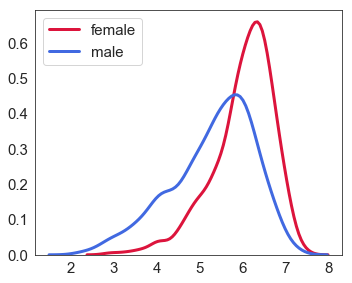

In [84]:
# plot trustworthy distribution by gender

fig, ax = plt.subplots(figsize=(5.5,4.5)) #(5.5,3.5))
ax.patch.set_alpha(0.0)  # 1.0 for white axis background
fig.patch.set_alpha(0.0)
sns.distplot(df_demo_trust[df_demo_trust.gender==0].trustworthy, hist=False, 
             label='female', color='crimson', kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.gender==1].trustworthy, hist=False, 
             label='male', color='royalblue', kde_kws={"lw": 3})
plt.xticks(size=15);
plt.yticks(size=15);
plt.legend(fontsize=15)
plt.xlabel(None);

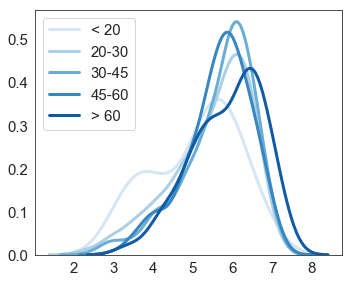

In [89]:
# plot trustworthy distribution by age

age_colors = sns.color_palette("Blues",5)

fig, ax = plt.subplots(figsize=(5.5,4.5))
ax.patch.set_alpha(0.0)  # 1.0 for white axis background
fig.patch.set_alpha(0.0)
sns.distplot(df_demo_trust[df_demo_trust.age.round()==1].trustworthy, hist=False, 
             label='< 20', color=age_colors[0], kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.age.round()==2].trustworthy, hist=False, 
             label='20-30', color=age_colors[1], kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.age.round()==3].trustworthy, hist=False, 
             label='30-45', color=age_colors[2], kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.age.round()==4].trustworthy, hist=False, 
             label='45-60', color=age_colors[3], kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.age.round()==5].trustworthy, hist=False, 
             label='> 60', color=age_colors[4], kde_kws={"lw": 3})
plt.xticks(size=15);
plt.yticks(size=15);
plt.legend(fontsize=15)
plt.xlabel(None);

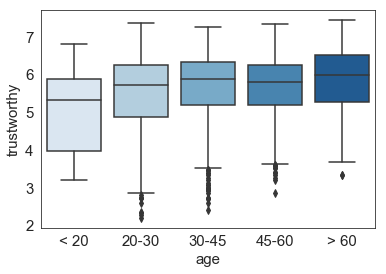

In [90]:
# plot trustworthy distribution by age (boxplot)

sns.boxplot(x=df_demo_trust.age.round(), y=df_demo_trust.trustworthy, palette='Blues')
plt.xticks(ticks=[0,1,2,3,4],labels=['< 20', '20-30', '30-45', '45-60', '> 60'], size=15)
plt.yticks(size=15)
plt.xlabel('age',fontsize=15);
plt.ylabel('trustworthy',fontsize=15);

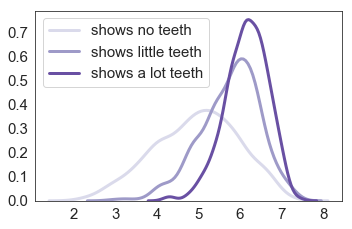

In [92]:
# plot trustworthy distribution by teeth

teeth_colors = sns.color_palette("Purples",3)

fig, ax = plt.subplots(figsize=(5.5,3.5))
ax.patch.set_alpha(0.0)  # 1.0 for white axis background
fig.patch.set_alpha(0.0)
sns.distplot(df_demo_trust[df_demo_trust.teeth==0].trustworthy, hist=False, 
             label='shows no teeth', color=teeth_colors[0], kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.teeth==1].trustworthy, hist=False, 
             label='shows little teeth', color=teeth_colors[1], kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.teeth==2].trustworthy, hist=False, 
             label='shows a lot teeth', color=teeth_colors[2], kde_kws={"lw": 3})
plt.xticks(size=15);
plt.yticks(size=15);
plt.legend(fontsize=15)
plt.xlabel(None);

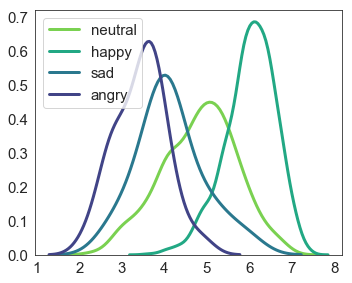

In [93]:
# plot trustworthy distribution by emotion
# 0: Neutral, 1: Happiness, 2: Sadness, 3: Anger, 4: Fear, 5: Surprise, 6: Disgust

emotion_colors = sns.color_palette("viridis_r",4)

fig, ax = plt.subplots(figsize=(5.5,4.5))
ax.patch.set_alpha(0.0)  # 1.0 for white axis background
fig.patch.set_alpha(0.0)
sns.distplot(df_demo_trust[df_demo_trust.emotion==0].trustworthy, hist=False, 
             label='neutral', color=emotion_colors[0], kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.emotion==1].trustworthy, hist=False, 
             label='happy', color=emotion_colors[1], kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.emotion==2].trustworthy, hist=False, 
             label='sad', color=emotion_colors[2], kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.emotion==3].trustworthy, hist=False, 
             label='angry', color=emotion_colors[3], kde_kws={"lw": 3})
plt.xticks(size=15);
plt.yticks(size=15);
plt.legend(fontsize=15, loc='upper left')
plt.xlabel(None);

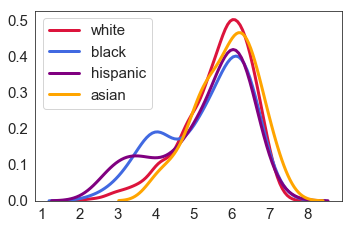

In [94]:
# plot trustworthy distribution by race
# 0: Other, 1: White, 2: Black, 3: East Asian, 4: South Asian, 5: Hispanic, 6: Middle East

fig, ax = plt.subplots(figsize=(5.5,3.5))
ax.patch.set_alpha(0.0)  # 1.0 for white axis background
fig.patch.set_alpha(0.0)
sns.distplot(df_demo_trust[df_demo_trust.race==1].trustworthy, hist=False, 
             label='white', color='crimson', kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.race==2].trustworthy, hist=False, 
             label='black', color='royalblue', kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.race==5].trustworthy, hist=False, 
             label='hispanic', color='purple', kde_kws={"lw": 3})
sns.distplot(df_demo_trust[df_demo_trust.race==3].trustworthy, hist=False, 
             label='asian', color='orange', kde_kws={"lw": 3})
plt.xticks(size=15);
plt.yticks(size=15);
plt.legend(fontsize=15)
plt.xlabel(None);

### d) Correlation of social ratings

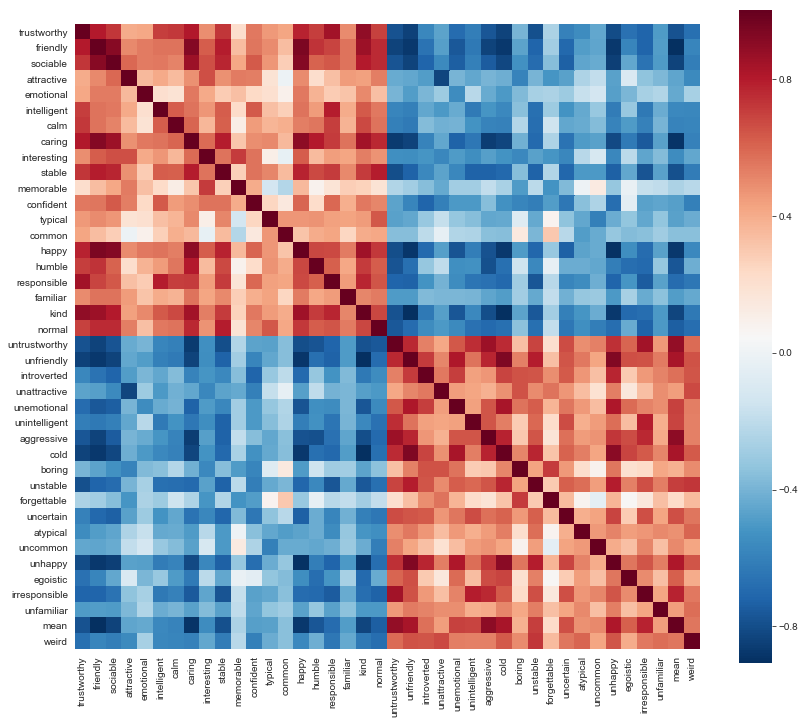

In [95]:
# plot heatmap of mean social ratings

corrm = df_mean[social_pos + social_neg].corr()
fig, ax = plt.subplots(1,1, figsize=(14,12))
sns.heatmap(corrm, cmap='RdBu_r', square=True);

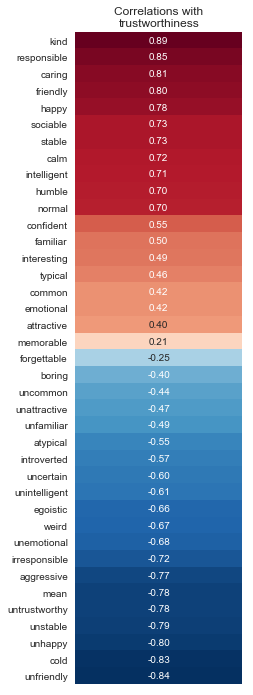

In [97]:
# plot heatmap only for trustworthiness with all other ratings

corr_trustworthy = corrm.iloc[0:1,:].T
corr_trustworthy = corr_trustworthy.sort_values(by='trustworthy', ascending=False).iloc[1:]

fig, ax = plt.subplots(figsize=(3,12))
sns.heatmap(corr_trustworthy, cmap='RdBu_r', square=False, annot=True, fmt='.2f', xticklabels='', cbar=False);
plt.title('Correlations with\ntrustworthiness');

In [99]:
# plot wordcloud to represent correlation strength between trustworthiness and all other social ratings

#!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

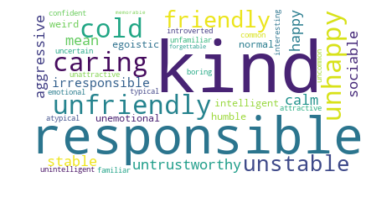

In [104]:
# Option 1: no color code

attr_freq_dict = dict(zip(corr_trustworthy.index, 
                          abs(corr_trustworthy.values).ravel()))
wordcloud2 = WordCloud(background_color="white", random_state=1).generate_from_frequencies(attr_freq_dict)

# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

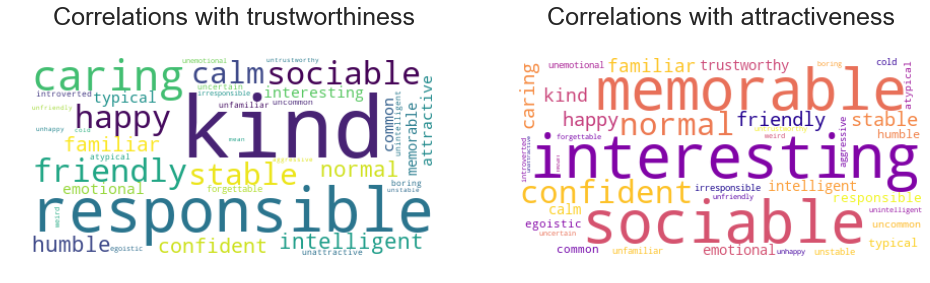

In [106]:
# Option 2: shift correlations from (-1,1) to (0,2) to make negative correlations smaller than positive correlations

trust_corr_dict = dict(zip(corr_trustworthy.index, 
                           corr_trustworthy.values.ravel()+1))
attractive_corr_dict = dict(zip(corr_attractive.index, 
                            corr_attractive.values.ravel()+1))

wordcloud_trust = WordCloud(background_color="white", 
                            random_state=1).generate_from_frequencies(trust_corr_dict)
wordcloud_attractive = WordCloud(background_color="white", colormap='plasma',
                                 random_state=3).generate_from_frequencies(attractive_corr_dict)


# Display the generated image:
fig, ax = plt.subplots(1,2,figsize=(16,6))

plt.subplot(121)
plt.imshow(wordcloud_trust, interpolation='bilinear')
plt.axis("off")
plt.title('Correlations with trustworthiness\n', size=25);

plt.subplot(122)
plt.imshow(wordcloud_attractive, interpolation='bilinear')
plt.axis("off")
plt.title('Correlations with attractiveness\n', size=25);

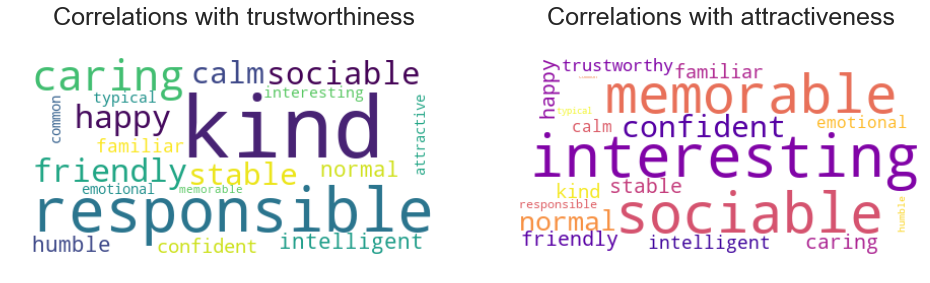

In [109]:
# Option 3: plot only correlation with positive social attributes

trust_corr_pos_dict = dict(zip(corr_trustworthy.index.drop(social_neg), 
                           corr_trustworthy.loc[corr_trustworthy.index.drop(social_neg),:].values.ravel()))
attractive_corr_pos_dict = dict(zip(corr_attractive.index.drop(social_neg), 
                                abs(corr_attractive.loc[corr_attractive.index.drop(social_neg),:].values).ravel()))

wordcloud_pos_trust = WordCloud(background_color="white", 
                                random_state=1).generate_from_frequencies(trust_corr_pos_dict)
wordcloud_pos_attractive = WordCloud(background_color="white", colormap='plasma',
                                     random_state=3).generate_from_frequencies(attractive_corr_pos_dict)

# Display the generated image:
fig, ax = plt.subplots(1,2,figsize=(16,6))

plt.subplot(121)
plt.imshow(wordcloud_pos_trust, interpolation='bilinear')
plt.axis("off")
plt.title('Correlations with trustworthiness\n', size=25);

plt.subplot(122)
plt.imshow(wordcloud_pos_attractive, interpolation='bilinear')
plt.axis("off")
plt.title('Correlations with attractiveness\n', size=25);

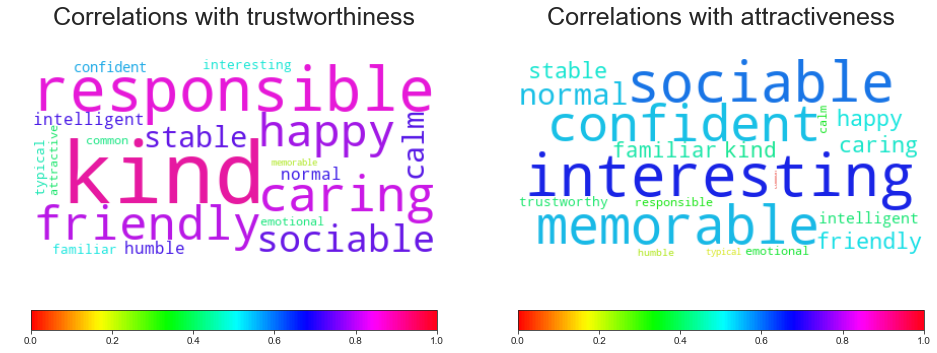

In [113]:
# Option 4: color words by frequency with HSL (Hue, Saturation, Lightness) colorbar from 0 to 1
# see: https://github.com/amueller/word_cloud/issues/88

def trust_color_func(word, **kwargs):
     return "hsl(%d, 80%%, 50%%)" % (360 * trust_corr_pos_dict[word])
    
def attractive_color_func(word, **kwargs):
     return "hsl(%d, 80%%, 50%%)" % (360 * attractive_corr_pos_dict[word])

wordcloud_pos_trust = WordCloud(background_color="white", color_func=trust_color_func, 
                                random_state=1).generate_from_frequencies(trust_corr_pos_dict)
wordcloud_pos_attractive = WordCloud(background_color="white", colormap='plasma', color_func=attractive_color_func, 
                                     random_state=3).generate_from_frequencies(attractive_corr_pos_dict)

# Display the generated image:
fig, ax = plt.subplots(1,2,figsize=(16,6))

plt.subplot(121)
plt.imshow(wordcloud_pos_trust, interpolation='bilinear')
plt.axis("off")
plt.title('Correlations with trustworthiness\n', size=25);
plt.set_cmap('hsv')
plt.clim(0, 1)
plt.colorbar(orientation='horizontal')

plt.subplot(122)
plt.imshow(wordcloud_pos_attractive, interpolation='bilinear')
plt.axis("off")
plt.title('Correlations with attractiveness\n', size=25);
plt.set_cmap('hsv')
plt.clim(0, 1)
plt.colorbar(orientation='horizontal');

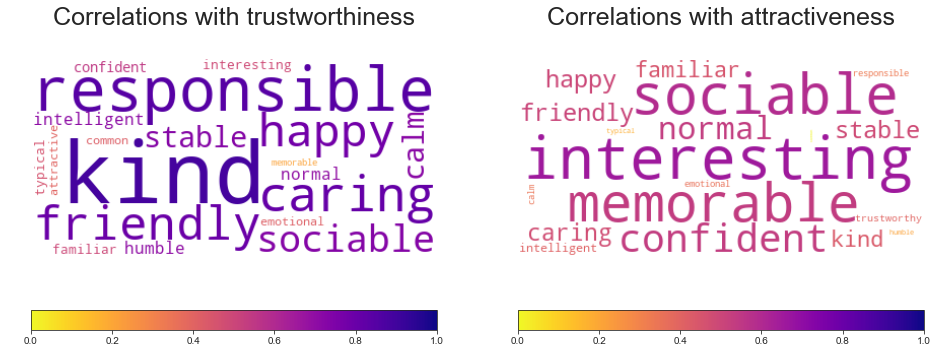

In [120]:
# Option 5: color words by frequency with colormaps

import matplotlib as mpl

selected_cmap = 'plasma_r' #  e.g. try: gnuplot2_r, jet, plasma_r, Spectral, YlGnBu, YlOrRd, viridis_r
cmap = mpl.cm.get_cmap(selected_cmap)
cmap_min = 0 #0.2
cmap_max = 1 #0.9

def trust_color_func(word, **kwargs):
    word_corr = trust_corr_pos_dict[word]
    word_corr = (word_corr-cmap_min) / (cmap_max - cmap_min)
    rgba = cmap(word_corr)  # rgba = cmap(0.5)
    r = (rgba[0]*255).astype('uint')
    g = (rgba[1]*255).astype('uint')
    b = (rgba[2]*255).astype('uint')
    return "rgb(%d, %d, %d)" % (r,g,b)

def attractive_color_func(word, **kwargs):
    word_corr = attractive_corr_pos_dict[word]
    word_corr = (word_corr-cmap_min) / (cmap_max - cmap_min)
    rgba = cmap(word_corr)  # rgba = cmap(0.5)
    r = (rgba[0]*255).astype('uint')
    g = (rgba[1]*255).astype('uint')
    b = (rgba[2]*255).astype('uint')
    return "rgb(%d, %d, %d)" % (r,g,b)

wordcloud_pos_trust = WordCloud(background_color='white', color_func=trust_color_func, random_state=1
                               ).generate_from_frequencies(trust_corr_pos_dict)

wordcloud_pos_attractive = WordCloud(background_color='white', color_func=attractive_color_func, random_state=1
                                    ).generate_from_frequencies(attractive_corr_pos_dict)

# Display the generated image:
fig, ax = plt.subplots(1,2,figsize=(16,6))

plt.subplot(121)
plt.imshow(wordcloud_pos_trust, interpolation='bilinear')
plt.axis("off")
plt.title('Correlations with trustworthiness\n', size=25);
plt.set_cmap(selected_cmap)
plt.clim(cmap_min, cmap_max)
plt.colorbar(orientation='horizontal');

plt.subplot(122)
plt.imshow(wordcloud_pos_attractive, interpolation='bilinear')
plt.axis("off")
plt.title('Correlations with attractiveness\n', size=25);
plt.set_cmap(selected_cmap)
plt.clim(cmap_min, cmap_max)
plt.colorbar(orientation='horizontal');

### e) Faces with minimal/maximal social ratings

In [122]:
# get image indices with minimal and maximal ratings for trustworthiness and attractiveness
img_trust_min5 = df_mean.iloc[df_mean.trustworthy.sort_values().index[:5],0]
img_trust_max5 = df_mean.iloc[df_mean.trustworthy.sort_values().index[-5:],0]

img_attract_min5 = df_mean.iloc[df_mean.attractive.sort_values().index[:5],0]
img_attract_max5 = df_mean.iloc[df_mean.attractive.sort_values().index[-5:],0]

In [ ]:
# display images
# Note: output not shown in GitHub because of license agreement for face images

import matplotlib.image as mpimg
img_path = '/Users/kacha/nf-ds/nf_capstone/10k_US_Data/10k US Adult Faces Database/Face Images/'

print('Trustworthy - low:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_trust_min5,start=1):
    plt.subplot(1,5,i)
    plt.imshow(mpimg.imread(img_path + file))
    plt.axis('off')
plt.show()

print('Trustworthy - high:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_trust_max5,start=1):
    plt.subplot(1,5,i)
    plt.imshow(mpimg.imread(img_path + file))
    plt.axis('off')
plt.show()

print('Attractive - low:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_attract_min5,start=1):
    plt.subplot(1,5,i)
    plt.imshow(mpimg.imread(img_path + file))
    plt.axis('off')
plt.show()

print('Attractive - high:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_attract_max5,start=1):
    plt.subplot(1,5,i)
    plt.imshow(mpimg.imread(img_path + file))
    plt.axis('off')
plt.show();

---

# 4) PCA

### a) Standard scaling

In [125]:
# Scaling: PCA requires scaling/normalization of the data to work properly

from sklearn.preprocessing import StandardScaler

df_for_pca = df_mean[social_pos + social_neg].copy()
scaler = StandardScaler()
df_mean_scaled = scaler.fit_transform(df_for_pca)
df_mean_scaled = pd.DataFrame(data=df_mean_scaled, columns=df_for_pca.columns)
df_mean_scaled.head()

,trustworthy,friendly,sociable,attractive,emotional,intelligent,calm,caring,interesting,stable,memorable,confident,typical,common,happy,humble,responsible,familiar,kind,normal,untrustworthy,unfriendly,introverted,unattractive,unemotional,unintelligent,aggressive,cold,boring,unstable,forgettable,uncertain,atypical,uncommon,unhappy,egoistic,irresponsible,unfamiliar,mean,weird
0,-0.298160,-1.211978,-1.033583,-0.056794,-1.683030,-0.318536,0.672600,-0.820637,-1.432521,0.087827,-0.825996,-0.305914,0.168044,0.326616,-1.419830,-0.606441,-0.069343,-1.215086,-0.622371,-0.092277,0.016431,0.792840,1.282991,0.120171,0.677684,-0.112962,0.982722,0.326971,2.073984,-0.480631,0.533350,0.670557,-0.233154,1.191070,0.088003,-0.429002,0.039644,-0.477182,0.887503,0.302184
1,1.197497,0.739394,0.704004,-0.173103,1.343117,1.030838,0.923388,1.303408,-0.353937,1.586082,-0.825996,0.742430,0.665219,0.958821,0.988329,0.997399,1.832468,-0.816264,1.217582,1.643043,-1.039982,-1.417420,-1.424947,-0.868273,-1.796321,-0.963596,-0.494566,-1.324542,-0.510352,-1.656183,0.075915,-1.361824,-1.705062,-1.914513,-1.246673,-1.981206,-1.431654,-1.629007,-0.851180,-2.033591
2,0.844949,0.690610,0.767025,-0.281104,0.405438,0.855419,1.202042,0.495143,-0.529207,0.559718,-0.345050,0.181688,0.966537,0.642719,0.699061,0.470423,0.921421,-0.624239,0.729994,0.242392,-0.911633,-0.826398,-0.568682,-0.343436,-0.971653,-0.886266,-1.140326,-0.418615,-0.109962,-0.777266,-0.381520,-0.546437,-1.793376,-0.819308,-0.529189,-0.502917,-1.132969,-0.865923,-0.851180,-0.452292
3,-1.857917,-2.350278,-2.294009,-1.170037,-2.919061,-1.843328,-0.567409,-1.892058,-2.416728,-1.174483,-1.306942,-1.366449,-0.434592,0.389836,-1.998367,-1.293801,-1.811722,-1.613908,-1.726343,-0.997123,1.793576,1.764383,1.357914,1.169846,1.017859,1.433646,1.867325,1.345136,0.533089,0.837746,1.004646,1.315565,1.032687,-1.419420,1.839282,0.553004,1.809627,0.962599,1.930712,-0.111228
4,-1.003256,-0.504606,-0.439382,0.383519,-0.077609,0.666507,0.087427,-1.384543,-1.338145,-0.148119,-0.374198,0.913091,1.478777,0.326616,-0.747281,-1.064681,0.010373,-1.805933,-0.741968,0.242392,1.062972,0.468992,-0.354616,0.058940,-0.085134,-0.963596,0.513882,0.703772,0.775750,0.035733,0.810583,0.585368,-0.027087,-1.914513,-0.421180,1.397741,-0.181603,0.285902,0.192030,-0.111228


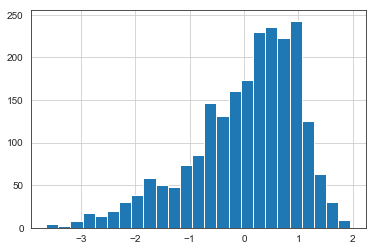

In [126]:
# check scaling for one attribute
df_mean_scaled.trustworthy.hist(bins=25);

### b) Perform PCA

In [127]:
# perform Principal Component Analysis (PCA)

from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca_results = pca.fit(df_mean_scaled)

In [136]:
# Write function to plot the explained variance ratio

def pca_screeplot(pca_results):

    plt.figure(figsize=(12,5))
    plt.scatter(x=[i+1 for i in range(len(pca_results.explained_variance_ratio_))],
                y = pca_results.explained_variance_ratio_)   # alpha=0.75, 
    plt.plot([i+1 for i in range(len(pca_results.explained_variance_ratio_))],
             pca_results.explained_variance_ratio_, 'b-', linewidth=1)   # alpha=0.75, 
    plt.title("Explained variance ratio of the fitted principal component vector", size=15)
    plt.grid(False)
    plt.xlabel("Principal components", size=12)
    plt.xticks([i+1 for i in range(len(pca_results.explained_variance_ratio_))])
    plt.yticks(fontsize=15)
    plt.ylabel("Explained variance ratio", size=12)
    plt.show()

In [130]:
pca_results.explained_variance_ratio_.cumsum()

array([0.55218268, 0.64767459, 0.69648103, 0.73505239, 0.76673751,
       0.79088144, 0.81190209, 0.82840954, 0.8428152 , 0.85627299,
       0.86783619, 0.87856807, 0.88867678, 0.89761191, 0.90632244,
       0.91429877, 0.92148857, 0.92787207, 0.93386717, 0.93966357,
       0.94505444, 0.95012514, 0.9547199 , 0.95899556, 0.96309875,
       0.96707971, 0.97088916, 0.97445859, 0.97770671, 0.98079227,
       0.98359417, 0.98635176, 0.98876941, 0.99070228, 0.99260177,
       0.99449195, 0.99606192, 0.99754164, 0.99891114, 1.        ])

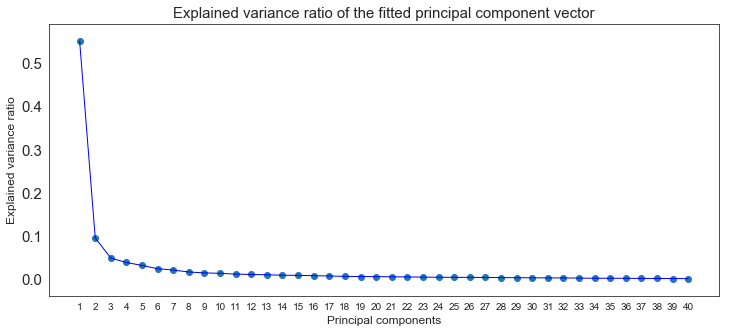

In [137]:
pca_screeplot(pca_results)

In [140]:
# repeat PCA with extracting only the first 2 principal components

pca = PCA(n_components=2, random_state=0)
pca_results = pca.fit(df_mean_scaled)
df_pca = pd.DataFrame(pca_results.components_.T, 
                      columns=['PC1', 'PC2'],  # , 'PC3'], 
                      index=df_mean_scaled.columns)

# reverse PC1 to have high/positive values for friendly and low/negative values for unfriendly
df_pca.PC1 = -df_pca.PC1
display(df_pca.head())
display(df_pca.tail())

,PC1,PC2
trustworthy,0.189170,-0.075807
friendly,0.197597,-0.016260
sociable,0.191857,0.061462
attractive,0.123587,0.273273
emotional,0.105434,0.085206


,PC1,PC2
egoistic,-0.130271,0.189607
irresponsible,-0.170119,0.119044
unfamiliar,-0.127575,-0.048282
mean,-0.191549,0.071559
weird,-0.160424,-0.048185


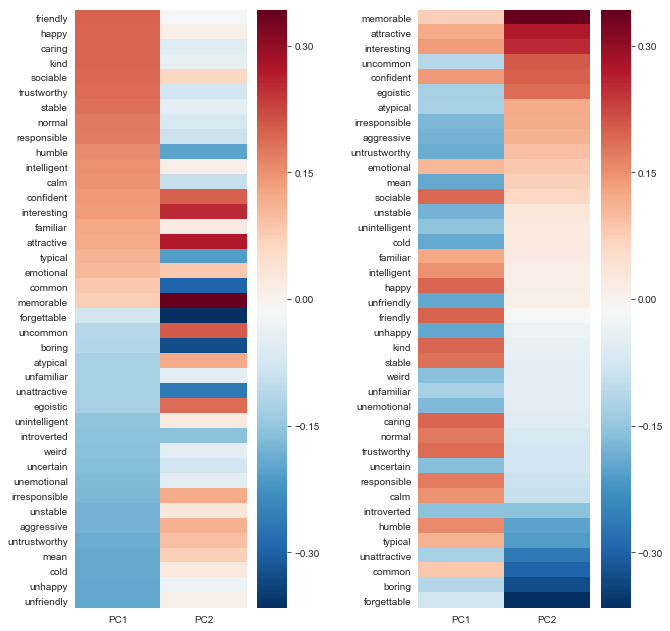

In [143]:
# plot principal components - left: sorted by the first component, right: sorted by the second component

plt.subplots(1,2, figsize=(10,11))
plt.subplots_adjust(wspace=0.6)

plt.subplot(1,2,1)
sns.heatmap(df_pca.sort_values(by='PC1', ascending=False), cmap='RdBu_r')
plt.ylabel(None);

plt.subplot(1,2,2)
sns.heatmap(df_pca.sort_values(by='PC2', ascending=False), cmap='RdBu_r')
plt.ylabel(None);

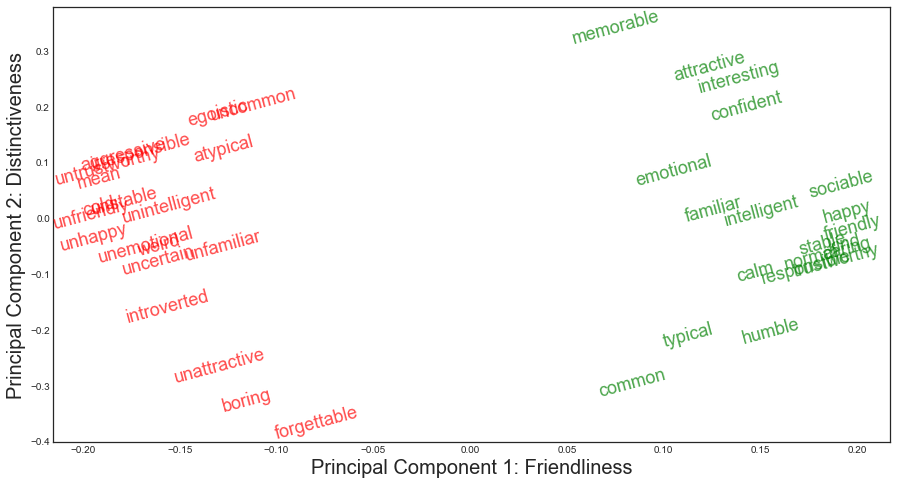

In [147]:
# plot first and second principal component of all social attributes 

colors = ['red', 'green']
with plt.style.context('seaborn-white'):
    
    fig, ax = plt.subplots(figsize=(15,8))
    plt.scatter(df_pca.PC1, df_pca.PC2, s=0)
    for i, txt in enumerate(df_pca.index):
        plt.annotate(txt, (df_pca.PC1[i], df_pca.PC2[i]),
                     ha="center", va="center", size=18, alpha=0.7,    # size = 10
                     rotation=15, color=colors[int(df_pca.PC1[i]>0)])
plt.grid(False)
plt.xlabel('Principal Component 1: Friendliness', size=20)
plt.ylabel('Principal Component 2: Distinctiveness', size=20);

### c) Transform data

In [148]:
# transform data

df_transformed = pd.DataFrame(pca.transform(df_mean_scaled), columns=['PC1', 'PC2'])
df_transformed = pd.concat([df_mean.filename, df_mean.imageID, df_transformed.PC1, df_transformed.PC2], axis=1)
df_transformed.head()

,filename,imageID,PC1,PC2
0,Google_1_Danielle Goble_5_oval.jpg,1,-2.945432,-1.792393
1,Google_1_Phillip Owensby_9_oval.jpg,2,6.743865,-1.865236
2,Google_1_Douglas Ziegler_3_oval.jpg,3,3.869043,-1.493440
3,Google_1_Donald Sauls_11_oval.jpg,4,-8.635581,-1.720190
4,Google_1_Eric Harman_5_oval.jpg,5,-1.512221,-0.785081


In [149]:
# save PCA dataframe for modeling
save_path = '/Users/kacha/nf-ds/nf_capstone/10k_US_Data/'
df_transformed.to_csv(save_path + 'df_PCA_transformed.csv', index=False, header=True)

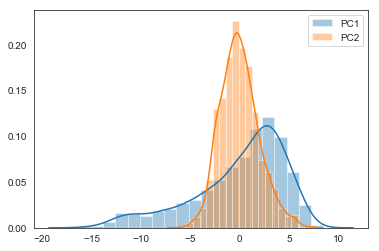

In [151]:
# plot distribution of transformed data

sns.distplot(df_transformed.PC1, bins=20)
sns.distplot(df_transformed.PC2, bins=20)
plt.xlabel(None)
plt.legend(['PC1', 'PC2']);

### d) Faces with minimal/maximal principal compontent scores

In [157]:
# get indices of the five images with minimal/maximal scores on first/second principal component

img_PC1_min5 = df_mean.iloc[df_transformed.PC1.sort_values().index[:5],0]
img_PC1_max5 = df_mean.iloc[df_transformed.PC1.sort_values().index[-5:],0]

img_PC2_min5 = df_mean.iloc[df_transformed.PC2.sort_values().index[:5],0]
img_PC2_max5 = df_mean.iloc[df_transformed.PC2.sort_values().index[-5:],0]

In [ ]:
# display images
# Note: output not shown in GitHub because of license agreement for face images

import matplotlib.image as mpimg

print('PC1 - positive:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_PC1_min5,start=1):
    plt.subplot(1,5,i)
    plt.imshow(mpimg.imread(img_path + file))
    plt.axis('off')
plt.show()

print('PC1 - negative:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_PC1_max5,start=1):
    plt.subplot(1,5,i)
    plt.imshow(mpimg.imread(img_path + file))
    plt.axis('off')
plt.show()

print('PC2 - common:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_PC2_min5,start=1):
    plt.subplot(1,5,i)
    plt.imshow(mpimg.imread(img_path + file))
    plt.axis('off')
plt.show()

print('PC2 - distinct:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_PC2_max5,start=1):
    plt.subplot(1,5,i)
    plt.imshow(mpimg.imread(img_path + file))
    plt.axis('off')
plt.show()

In [162]:
# get indices of images which are only extreme in one of the principal components

import warnings
warnings.filterwarnings('ignore')

n_head = 5

# low PC1, neutral PC2:
lowPC1_neutralPC2 = df_transformed.sort_values(by='PC1', ascending=True)[abs(df_transformed.PC2)<1].head(n_head).index  
img_lowPC1_neutralPC2 = df_mean.iloc[lowPC1_neutralPC2,0]

# high PC1, neutral PC2:
highPC1_neutralPC2 = df_transformed.sort_values(by='PC1', ascending=False)[abs(df_transformed.PC2)<1].head(n_head).index  
img_highPC1_neutralPC2 = df_mean.iloc[highPC1_neutralPC2,0]

# low PC2, neutral PC1:
lowPC2_neutralPC1 = df_transformed.sort_values(by='PC2', ascending=True)[abs(df_transformed.PC1)<1].head(n_head).index  
img_lowPC2_neutralPC1 = df_mean.iloc[lowPC2_neutralPC1,0]

# high PC2, neutral PC1:
highPC2_neutralPC1 = df_transformed.sort_values(by='PC2', ascending=False)[abs(df_transformed.PC1)<1].head(n_head).index
img_highPC2_neutralPC1 = df_mean.iloc[highPC2_neutralPC1,0]

In [ ]:
# display images
# Note: output not shown in GitHub because of license agreement for face images

print('Low PC1, neutral PC2:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_lowPC1_neutralPC2):
    plt.subplot(1,5,i+1)
    plt.imshow(mpimg.imread(img_path + file))
    title = 'PC1: {}\nPC2: {}'.format(df_transformed.iloc[lowPC1_neutralPC2[i]].PC1.round(2),
                                      df_transformed.iloc[lowPC1_neutralPC2[i]].PC2.round(2))
    plt.title(title)
    plt.axis('off')
plt.show()

print('High PC1, neutral PC2:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_highPC1_neutralPC2):
    plt.subplot(1,5,i+1)
    plt.imshow(mpimg.imread(img_path + file))
    title = 'PC1: {}\nPC2: {}'.format(df_transformed.iloc[highPC1_neutralPC2[i]].PC1.round(2),
                                      df_transformed.iloc[highPC1_neutralPC2[i]].PC2.round(2))
    plt.title(title)
    plt.axis('off')
plt.show()

print('Low PC2, neutral PC1:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_lowPC2_neutralPC1):
    plt.subplot(1,5,i+1)
    plt.imshow(mpimg.imread(img_path + file))
    title = 'PC1: {}\nPC2: {}'.format(df_transformed.iloc[lowPC2_neutralPC1[i]].PC1.round(2),
                                      df_transformed.iloc[lowPC2_neutralPC1[i]].PC2.round(2))
    plt.title(title)
    plt.axis('off')
plt.show()

print('High PC2, neutral PC1:')
fig, ax = plt.subplots(1,5, figsize=(15,6))
for i, file in enumerate(img_highPC2_neutralPC1):
    plt.subplot(1,5,i+1)
    plt.imshow(mpimg.imread(img_path + file))
    title = 'PC1: {}\nPC2: {}'.format(df_transformed.iloc[highPC2_neutralPC1[i]].PC1.round(2),
                                      df_transformed.iloc[highPC2_neutralPC1[i]].PC2.round(2))
    plt.title(title)
    plt.axis('off')
plt.show()

In [165]:
# get 10% and 90% quantiles for first and second principal compontent

PC1_q10, PC2_q10 = df_transformed[['PC1','PC2']].quantile(0.1)
PC1_q90, PC2_q90 = df_transformed[['PC1','PC2']].quantile(0.9)
PC1_q10, PC2_q10, PC1_q90, PC2_q90

(-7.238112321725247, -2.3890574596126886, 4.925068240227362, 2.603906023620128)

In [166]:
# get indices of images which are at opposite extremes for PC1 and PC2

lowPC1_highPC2  = df_transformed[(df_transformed.PC1 < PC1_q10) & (df_transformed.PC2 > PC2_q90)]
lowPC1_lowPC2   = df_transformed[(df_transformed.PC1 < PC1_q10) & (df_transformed.PC2 < PC2_q10)]
highPC1_lowPC2  = df_transformed[(df_transformed.PC1 > PC1_q90) & (df_transformed.PC2 < PC2_q10)]
highPC1_highPC2 = df_transformed[(df_transformed.PC1 > PC1_q90) & (df_transformed.PC2 > PC2_q90)]

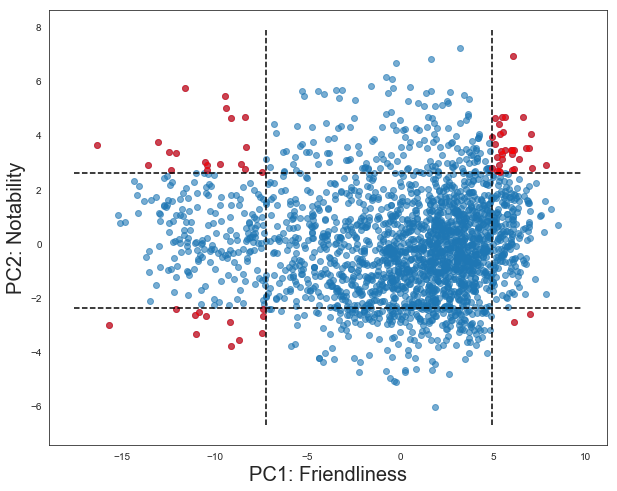

In [168]:
# plot data points which are at opposite extremes for PC1 and PC2 in red

fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df_transformed.PC1, df_transformed.PC2, alpha=0.6);
plt.vlines((PC1_q10, PC1_q90), plt.gca().get_ylim()[0], plt.gca().get_ylim()[1], 
           linestyles='dashed', color='k')
plt.hlines((PC2_q10, PC2_q90), plt.gca().get_xlim()[0], plt.gca().get_xlim()[1], 
           linestyles='dashed', color='k')
plt.scatter(lowPC1_highPC2.PC1, lowPC1_highPC2.PC2, color='red', alpha=0.6)
plt.scatter(lowPC1_lowPC2.PC1, lowPC1_lowPC2.PC2, color='red', alpha=0.6)
plt.scatter(highPC1_lowPC2.PC1, highPC1_lowPC2.PC2, color='red', alpha=0.6)
plt.scatter(highPC1_highPC2.PC1, highPC1_highPC2.PC2, color='red', alpha=0.6)

plt.xlabel('PC1: Friendliness', size=20)
plt.ylabel('PC2: Distinctiveness', size=20);

In [ ]:
# plot images that belong to the red datapoints
# Note: output not shown in GitHub because of license agreement for face images

# select one of the four 'red corners' (see above)
chosen_df = highPC1_lowPC2.copy() 
#chosen_df = highPC1_highPC2.copy() 
#chosen_df = lowPC1_highPC2.copy() 
#chosen_df = lowPC1_lowPC2.copy()

for img_idx in chosen_df.index:
    
    file = df_mean.iloc[img_idx,0]
    plt.imshow(mpimg.imread(img_path + file))
    title = '{}\nPC1: {}\nPC2: {}'.format(img_idx, chosen_df.loc[img_idx].PC1.round(2),
                                          chosen_df.loc[img_idx].PC2.round(2))
    plt.title(title)
    plt.axis('off')
    plt.show()